# Выявление закономерностей, определяющих успешность компьютерных игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В вашем распоряжении данные до 2016, полученные из открытых источников. Нужно отработать принципы работы с этими данными с целью составления прогнозов по продажам.

***Цель исследования***

Отработка принципов работы с набором данных для составления прогноза по продажам на будущий период времени.

***Ход исследования***

1. Обзор данных, полученных из файла /datasets/games.csv.
2. Предобработка данных:
    - замена названий столбцов;
    - преборазование типов данных;
    - обработка пропусков при необходимости;
    - создание столбца с суммарными продажами по регионам.
3. Проведение исследовательского анализа данных:
    - выпуск игр по годам;
    - динамика продаж по платформам;
    - определение актуального для построения прогноза периода времени;
    - выбор потенциально прибыльных платформ;
    - визуализация глобальных продаж в разбивке по платформам (ящик с усами);
    - влияние на продажи отзывов критиков и пользователей;
    - распределение по жанрам;
    - портрет пользователя по регионам (США, Европа, Япония);
4. Проверка гипотез:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action и Sports разные.
    
***Описание данных***

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Обзор данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from scipy import stats as st

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv')
    
except:
    df = pd.read_csv('C:\\Users\\79199\\Documents\\Учёба\\Аналитика\\Сборные проекты\\Итоговый-1\\games.csv') 

df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В датасете мы видим следующие проблемы:
- неудачные названия столбцов - лучше привести к одному регистру;
- неудачные типы данных: год выпуска логичнее преобразовать из int в float, рейтинг пользователей также привести к float;
- в столбцах `critic_score`, `user_score` и `rating` (годы выпуска, рейтинг критиков, рейтинг пользователей, возр.рейтинг) много пропусков, их следует обработать.

In [4]:
# приведение названий столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [5]:
df.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
# процент пропусков
df.isnull().sum().sort_values(ascending = False) / df.shape[0] * 100

critic_score       51.319174
rating             40.478612
user_score         40.089740
year_of_release     1.609333
name                0.011965
genre               0.011965
platform            0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
dtype: float64

Больше всего пропусков (более 51%) в столбце "сritic_score", около 40% пропусков в столбцах "user_score" и "rating".

Так как пропусков в столблце `year_of_release` меньше 2%, удалим эти данные из датасета.

In [7]:
df = df.dropna(subset=['year_of_release'])

Преобразуем тип столбца "year_of_release".

In [8]:
df['year_of_release'] = df['year_of_release'].astype('int')

Посмотрим, какие есть значения в столбце "user_score":

In [9]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Как видим, здесь встречается значение "0", обозначающее нулевой рейтинг игры - следовательно, мы не можем использовать ноль для заполнения пропусков. Будем использовать для этих целей "-1".
Рассмотрим ближе значение "tbd" (видимо, to be decided).

In [10]:
# tbd - to be decided
df[df['user_score'] == 'tbd']['user_score'].count()

2376

In [11]:
df[df['user_score'] == 'tbd']['year_of_release']

119      2010
301      2005
520      2011
645      2010
718      2010
         ... 
16695    2001
16697    2003
16698    2008
16704    2008
16706    2003
Name: year_of_release, Length: 2376, dtype: int32

Так как значение `tbd` встречается не только в последнем году датасета, но и в более ранних годах, заменим на `Nan`.

In [12]:
df.loc[df['user_score'] == 'tbd','user_score'] = np.nan

In [13]:
# изменение типа столбца
df['user_score'] = df['user_score'].astype('float')

In [14]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Здесь `tbd` нет, переходим к поиску скрытых дубликатов. Приведем значения столбцов типа `object`к нижнему регистру:

In [15]:
# проверка на наличие скрытых дубликатов
df['name'] = df['name'].str.lower()
df['platform'] = df['platform'].str.lower()
df['genre'] = df['genre'].str.lower()
df['rating'] = df['rating'].str.lower()

In [16]:
df.duplicated().sum()

0

Дубликатов нет. Заменим пропуски в столбцах `user_score` и `critic_score` на -1.

In [17]:
# отсутствующие значения в рейтинге заменим на -1 (0 это тоже рейтинг)
df['user_score'] = df['user_score'].fillna(-1)
df['critic_score'] = df['critic_score'].fillna(-1)

In [18]:
df.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,NaN
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,e
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,e
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,e
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,NaN


Добавим к датасету столбец `total_sales` с суммарными продажами по всем трем регионам.

In [19]:
# добавим столбец `total_sales`
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN,31.38
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,NaN,30.26
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,e,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,e,28.91
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,e,28.32
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,NaN,28.31


Рассмотрим подробнее столбец с возрастным рейтингом:

In [20]:
df['rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

Приведем расшифровку рейтингов ESRB:

- `е` - everyone (для всех категорий пользователей)
- `m` - mature (для взрослых)
- `t` - teen (для подростков)
- `e10+` - everyone 10 and older (для всех старше 10 лет)
- `k-a` - kids to adults (для детей и взрослых, от 6 лет и старше)
- `ao` - adults only (только для взрослых, строго старше 18 лет)
- `ec` - early childhood (для детей младшего возраста, от 3 лет и старше)
- `rp` - rating pending (рейтинг ожидается)

Возможно, количество пропусков в столбце с возрастным рейтингом объясняется тем, что ESRB была создана в 1994, а данные имеются с 1980 года. Так как для прогнозов старые данные не нужны, оставим эти пропуски без изменений. Посмотрим на пропуски в столбце с возрастным рейтингом в разрезе лет, чтобы проверить эту гипотезу.

In [21]:
# кол-во пропусков в столбце `rating`
df['rating'].isnull().sum()

6678

Text(0.5, 1.0, 'Количество пропусков в `rating` по годам')

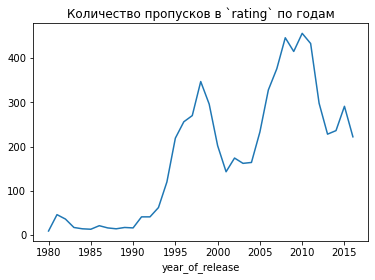

In [22]:
df['rating_isna'] = df['rating'].isna()
df.groupby('year_of_release')['rating_isna'].sum().plot(kind='line').set_title('Количество пропусков в `rating` по годам')

Предположение не подтвердилось. Напротив, после 1994 года игр, оставшихся без рейтинга, резко становится больше.

Заменим отсутствующие значения в столбце с возрастным рейтингом на значение `undef` (undefined), чтобы в дальнейшем можно было включить категорию игр без рейтинга в анализ.

In [23]:
df['rating'] = df['rating'].fillna('undef')
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,rating_isna
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54,False
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,undef,40.24,True
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52,False
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77,False
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,undef,31.38,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,-1.0,-1.0,undef,0.01,True
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,-1.0,-1.0,undef,0.01,True
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,undef,0.01,True
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,-1.0,-1.0,undef,0.01,True


***Выводы***

В данном разделе мы привели к нижнему регистру названия столбцов, оценили количество пропусков в данных, убедились в отсутствии дубликатов. Заменили пропуски в столбцах с рейтингами пользвователей и критиков на значение "-1", а пропуски в столбце с возрастным рейтингом на столбец "undef" (undefined). Добавили столбец с суммарными продажами по всем трем регионам.

## Исследовательский анализ данных

### 1. Выпуск игр в разные годы

Рассмотрим, как менялось количество выпускаемых игр со временем.

In [24]:
release_years_pivot = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
release_years_pivot

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Text(0.5, 1.0, 'Количество выпускаемых игр по годам')

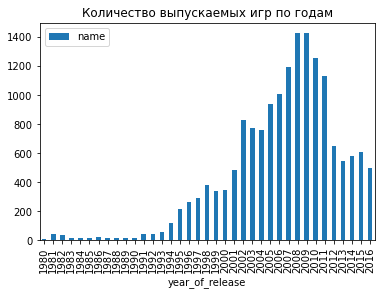

In [25]:
release_years_pivot.plot(y='name', kind='bar').set_title('Количество выпускаемых игр по годам')
                    

На графике четко прослеживаются четыре периода, приблизительно совпадающие с границами десятилетий:

- появление первых игр в 1980 и 1981 годах, затем долгое плато вплоть до 1991 года. Такой длинный застой может объясняться малыми мощностями компьютеров и сравнительно небольшим количеством самих компьютеров. В этот период мало казуальных игр, скорее они предназначены для узкой и довольно специфической аудитории. 

- 1992-2000 - с распространением ПК растет и производство компьютерных игр, расширяется аудитория.

- 2001 - 2010 - появление видеоускорителей позволяет создавать игры со все более реалистичной графикой; бум на рынке компьютерных игр.

- Спад после 2011 - с достижением предельной реалистичности заканчиваются прорывы в области компьютерной графики. Начинается резкий спад, продолжающийся вплоть до 2016 года. Возможно, спад связан еще с тем, что в датасете не представлены игры для мобильных платформ. Проверим это предположение.

In [26]:
df['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

Действительно, в списке платформ отсутствуют android и iphone, значит в датасете нет мобильных платформ, на которые начался массовый переход после 2010 г. Значит, мы видим на графике, как мобильные платформы откусили часть рынка после 2010 года.

### 2. Динамика продаж по платформам

Для начала определим самые популярные платформы (выпустившие суммарно больше всего игр).

In [27]:
sales_platforms =  df.groupby(['platform'])\
                                .agg({'total_sales' : 'sum'})\
                                .sort_values(['total_sales'], ascending=False)\
                                .reset_index()
top_sales_platforms = sales_platforms.head(5)
top_sales_platforms

,platform,total_sales
0,ps2,1233.56
1,x360,961.24
2,ps3,931.34
3,wii,891.18
4,ds,802.78


In [28]:
top_platforms = list(top_sales_platforms['platform'])
top_platforms

['ps2', 'x360', 'ps3', 'wii', 'ds']

Посмотрим как менялись продажи по платформам с течением лет. Для этого сгруппируем данные по годам и платформам с помощью `pivot_table`:

Text(0.5, 1.0, 'Проданные копии (млн.)')

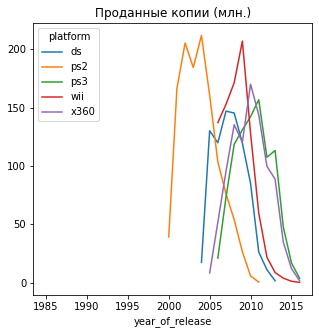

In [29]:
platform_sales_dynamic = df[df['platform'].isin(top_platforms)].pivot_table(values='total_sales', index='year_of_release', columns='platform', aggfunc='sum')
platform_sales_dynamic.plot(figsize=(5, 5)).set_title('Проданные копии (млн.)')

Возьмем данные после 2000 года:

Text(0.5, 1.0, 'Проданные копии (млн.)')

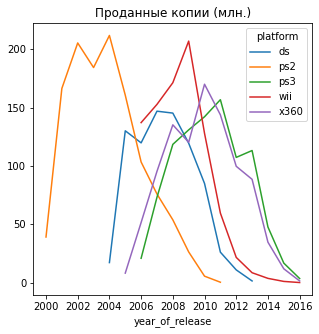

In [30]:
fresh_sales = df.query('year_of_release >= 2000')
platform_sales_dynamic = fresh_sales[fresh_sales['platform'].isin(top_platforms)].pivot_table(values='total_sales', index='year_of_release', columns='platform', aggfunc='sum')
platform_sales_dynamic.plot(figsize=(5, 5)).set_title('Проданные копии (млн.)')

На графике видно, что популярные платформы "живут" приблизительно 10 лет. При этом для достижения пика популярности им требуется от двух до пяти лет, после чего начинается спад.

### 3. Данные за актуальный период

Так как рынок компьютерных игр развивается скачкообразно, для прогноза нам нужные актуальные данные. Для анализа возьмем 2014-2016 года (не забываем, что данные за 2016 год могут быть неполными).

Text(0.5, 1.0, 'Суммарные продажи по всем платформам')

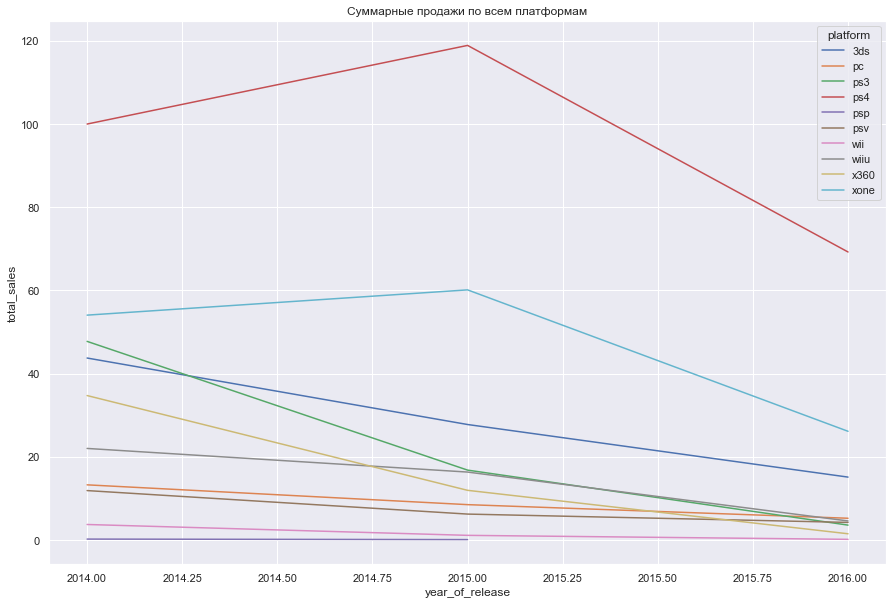

In [31]:
# делаем срез по годам больше 2014
recent_sales = df.query('year_of_release >= 2014')
recent_sales_pivot = recent_sales.pivot_table(index=['year_of_release', 'platform'], values='total_sales', aggfunc='sum')

# строим график по всем платформам
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(data=recent_sales_pivot, x='year_of_release', y='total_sales', hue='platform').set_title('Суммарные продажи по всем платформам')

Мы видим, что самые высокие продажи у X-One, ps-4 и 3ds, но в целом все продажи падают. Посмотрим на количество выпускаемых игр.

Text(0.5, 1.0, 'Кол-во выпускаемых игр (млн.копий) по всем платформам')

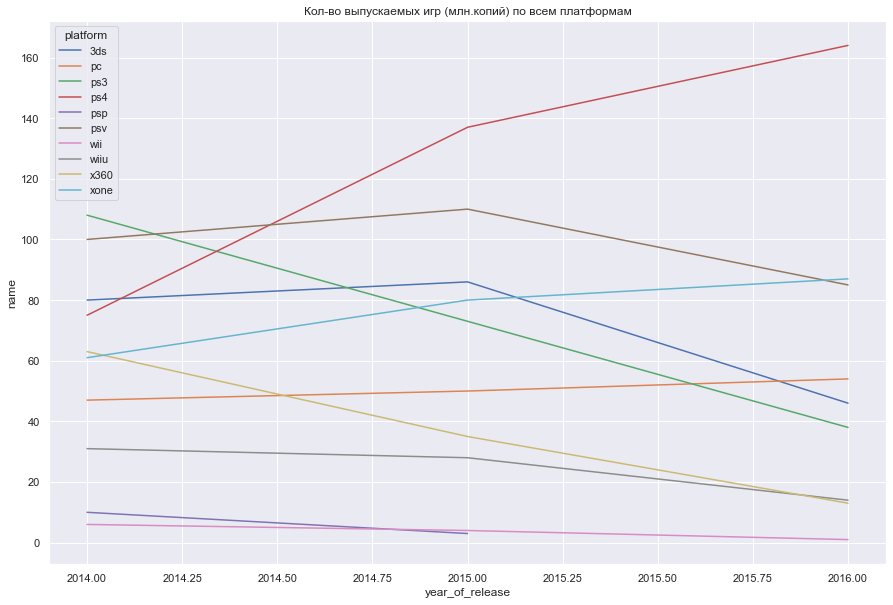

In [32]:
recent_sales_pivot = recent_sales.pivot_table(index=['year_of_release', 'platform'], values='name', aggfunc='count')
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(data=recent_sales_pivot, x='year_of_release', y='name', hue='platform').set_title('Кол-во выпускаемых игр (млн.копий) по всем платформам')

X-One и ps4 наращивают количество выпускаемых игр, последняя особенно. Также растет количество выпускаемых игр для PC.

### 4. Boxplot по глобальным продажам

Для дальнейшего анализа будем брать данные только за актуальный период, с 2014 по 2016 гг. Для этого создадим новый датафрейм.

In [33]:
df_2 = df.query('year_of_release >= 2014')
df_2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,rating_isna
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,undef,14.63,True
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62,False
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,-1.0,-1.0,undef,11.68,True
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,e,8.58,False
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,undef,7.98,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,undef,0.01,True
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,-1.0,-1.0,undef,0.01,True
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,-1.0,-1.0,undef,0.01,True
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,undef,0.01,True


Сначала построим "ящик с усами" по глобальным продажам:

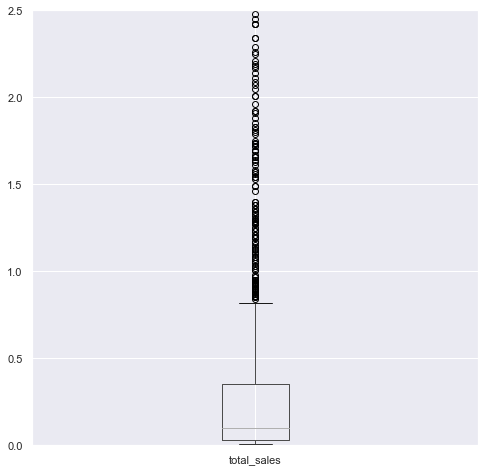

In [34]:
plot = df_2.boxplot('total_sales', figsize=(8, 8)).set_ylim(0, 2.5)

In [35]:
df_2['total_sales'].describe()

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: total_sales, dtype: float64

В описании данных мы видим, что среднее значительно превышает медиану, что указывает на большое количество выбросов. Их хорошо видно на графике. Нижний "ус" упирается в ноль - далеко не все игры приносят прибыль. Зато крупные платформы регулярно устраивают выбросы, выпуская игры ААА-класса (высокобюджетные игры, рассчитанные на массовую аудиторию и требующие больших затрат как на саму разработку, так и на рекламную компанию к моменту ее выхода).

Посмотрим, все ли платформы могут "похвастаться" такими выбросами.

Text(0.5, 1.0, 'Суммарные продажи по платформам в 2014-2016 гг.')

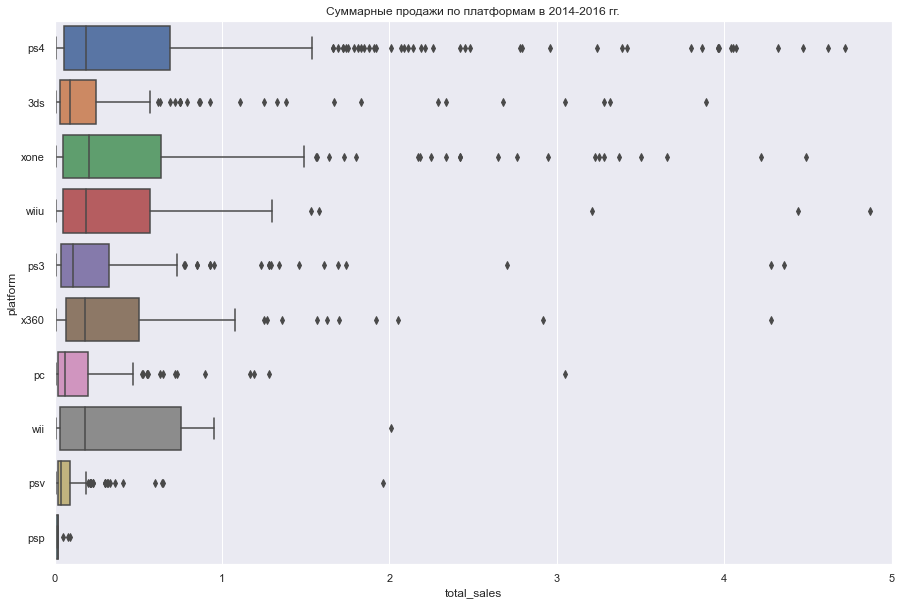

In [36]:
sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(x=df_2['total_sales'], y=df_2['platform']).set_xlim(0, 5)
plt.title('Суммарные продажи по платформам в 2014-2016 гг.')

Действительно, у крупных платформ (ps4, 3ds, X-One) периодически выходят игры, приносящие прибыль, намного превосходящую медианные значения.

Для более наглядного представления, ограничим ось Х двумя миллионами копий.

Text(0.5, 1.0, 'Суммарные продажи по платформам в 2014-2016 гг.')

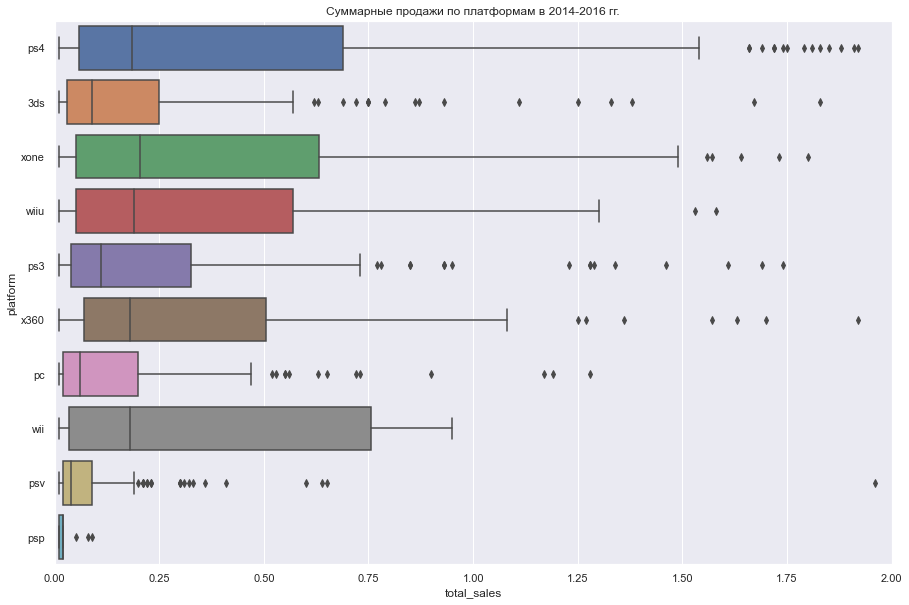

In [37]:
sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(x=df_2['total_sales'], y=df_2['platform']).set_xlim(0, 2)
plt.title('Суммарные продажи по платформам в 2014-2016 гг.')

Мы видим, что у крупных платформ медианное значение количества проданных копий не превышает 250 000. Верхний квартиль для лидеров рынка (ps4, wii, x-one и wiiu) не превышает 750 000.

### 5. Влияние отзывов

Определим самую популярную платформу по количеству выпущенных игр.

In [38]:
# сгруппируем данные по количеству выпущенных игр на платформе 
most_popular_platform = df_2.groupby('platform').agg({'name':'count'}).reset_index()
most_popular_platform.sort_values(by='name', ascending=False).head()

,platform,name
3,ps4,376
5,psv,295
9,xone,228
2,ps3,219
0,3ds,212


In [39]:
# отфильтруем отсутствующие данные
top_platform_critic = df_2[df_2['critic_score'] != -1]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

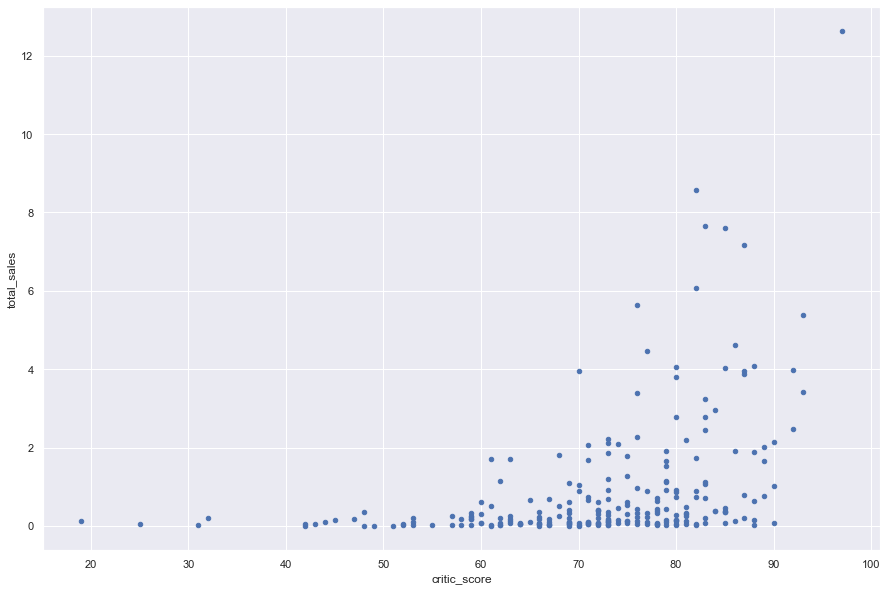

In [40]:
# посмотрим корреляцию между отзывами критиков и продажами для ps4
ps4_critic = top_platform_critic[top_platform_critic['platform'] == 'ps4']
ps4_critic.plot(x='critic_score', y='total_sales', kind='scatter')

Корреляция присутствует: чем выше отзывы критиков, тем больше продажи.

In [42]:
ps4_critic['critic_score'].corr(ps4_critic['total_sales'])

0.40266141068104083

Мы видим небольшую корреляцию между отзывами критиков и продажами.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

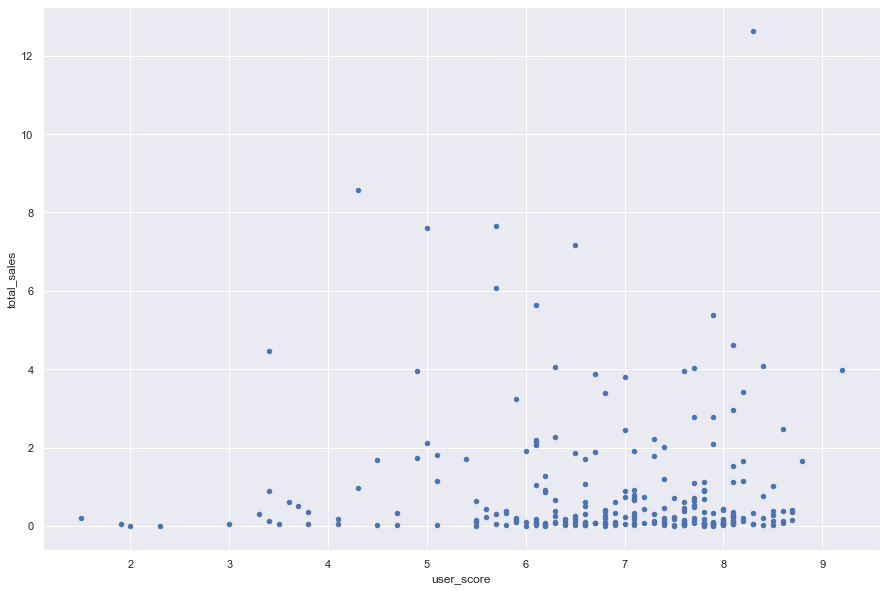

In [43]:
# посмотрим корреляцию между отзывами пользователей и продажами для ps4
top_platform_user = df_2[df_2['user_score'] != -1]
ps4_user = top_platform_user[top_platform_user['platform'] == 'ps4']
ps4_user.plot(x='user_score', y='total_sales', kind='scatter')

In [44]:
ps4_user['total_sales'].corr(ps4_user['user_score'])

-0.040131589472697356

Если отзывы критиков в случае с платформой ps4 коррелируют с продажами, то между отзывами пользователей и продажами корреляции почти нет.

Посмотрим на корреляции между отзывами и продажами для платформ psv и X-One, которые наращивают количество выпускаемых игр, а также для PC.

***psv***

In [45]:
psv_critic = top_platform_critic[top_platform_critic['platform'] == 'psv']
psv_critic['critic_score'].corr(psv_critic['total_sales'])

0.04266490657009526

In [46]:
psv_user = top_platform_user[top_platform_user['platform'] == 'psv']
psv_user['user_score'].corr(psv_user['total_sales'])

-0.16845504978064446

Корреляция между отзывами критиков и пользователей и продажами для платформы psv отсутствует.

***X-One***

In [47]:
xone_critic = top_platform_critic[top_platform_critic['platform'] == 'xone']
xone_critic['critic_score'].corr(xone_critic['total_sales'])

0.42867694370333226

In [48]:
xone_user = top_platform_user[top_platform_user['platform'] == 'xone']
xone_user['user_score'].corr(xone_user['total_sales'])

-0.0703839280647581

Для платформы X-One прослеживается слабая корреляция между отзывами критиков и продажами; связи между отзывами пользователей и продажами не наблюдается.

***PC***

In [49]:
pc_critic = top_platform_critic[top_platform_critic['platform'] == 'pc']
pc_critic['critic_score'].corr(pc_critic['total_sales'])

0.17463413769350036

In [50]:
pc_user = top_platform_user[top_platform_user['platform'] == 'pc']
pc_user['user_score'].corr(pc_user['total_sales'])

-0.07159665703472451

Снова корреляция отсутствует.

Посмотрим, есть ли корреляция между отзывами критиков и пользователей.

In [51]:
# отфильтруем отсутствующие данные
critic_score = df_2[df_2['critic_score'] != -1]
user_score = df_2[df_2['user_score'] != -1]

In [52]:
# создадим датафрейм из двух столбцов, оценка критиков и оценка пользователей
corr_df = pd.DataFrame()
corr_df['critic_score'] = critic_score['critic_score']
corr_df['user_score'] = user_score['user_score']
corr_df

,critic_score,user_score
42,97.0,8.3
77,82.0,4.3
92,83.0,5.7
94,85.0,5.0
105,87.0,6.5
...,...,...
16597,65.0,6.0
16630,63.0,8.2
16652,81.0,8.5
16660,74.0,6.7


In [53]:
# рассчитаем корреляци
corr = corr_df[['critic_score', 'user_score']].corr()
corr.style.format("{:.2%}")

,critic_score,user_score
critic_score,100.00%,50.45%
user_score,50.45%,100.00%


О какой бы платформе ни шла речь, мы видим наличие корреляции между количеством проданных копий и отзывами критиков и пользователей.

### 6. Распределение по жанрам

Сгруппируем датасет по жанрам.

In [54]:
# группировка по жанрам
most_popular_genre = df_2.groupby('genre')\
                        .agg({'name':'count'}).reset_index()
most_popular_genre.sort_values(by='name', ascending=False).head(10)

,genre,name
0,action,619
7,role-playing,221
1,adventure,185
10,sports,161
8,shooter,128
3,misc,113
6,racing,69
2,fighting,60
9,simulation,44
4,platform,38


Больше всего выпускается игр в жанрах `action`, `role-playing` и `adventure`. Посмотрим, какие из них лучше всего продаются.

In [55]:
# группировка по жанрам, входящим в топ-10 по продажам
genre_top_sales =  df_2.groupby(['genre']).agg({'total_sales' : 'sum'}).reset_index()
genre_top_sales.sort_values(by='total_sales', ascending=False).head(10)

,genre,total_sales
0,action,199.36
8,shooter,170.94
10,sports,109.48
7,role-playing,101.44
3,misc,37.55
2,fighting,28.22
6,racing,27.52
4,platform,18.09
1,adventure,17.55
9,simulation,13.13


Лидерами продаж являются жанры `action`, `shooter` и `sport`. Наименее популярны `adventure` и `simulation`. Можно сделать вывод, что динамичные игры популярнее спокойных.

In [56]:
# медианные продажи по жанрам
genre_top_sales =  df_2.groupby(['genre']).agg({'total_sales' : 'median'}).reset_index()
genre_top_sales.sort_values(by='total_sales', ascending=False).head(10)

,genre,total_sales
8,shooter,0.515
10,sports,0.180
4,platform,0.140
2,fighting,0.125
7,role-playing,0.110
9,simulation,0.100
0,action,0.090
3,misc,0.090
6,racing,0.090
11,strategy,0.060


Шутеры и спортивные игры по-прежнему занимают верхние позиции, а вот экшн скатился с первого на седьмое место. Появились стратегии, которые даже не вошли в топ-10 по продажам, симуляторы поднялись с последней позиции в середину списка.

***Выводы***

Мы посмотрели динамику компьютерного рынка, начиная с момента его зарождения (1980 г.) по 2016 г.; выделили четыре фазы его развития и пришли к заключению, что для построения прогнозов значимы только последние три года, с 2014 по 2016.
В среднем платформа "живет" около десяти лет, достигая своего "расцвета" на второй-пятый года после появления.
Особенности рынка таковы, что часто игры вовсе не приносят дохода; зато крупные платформы регулярно устраивают ААА-выбросы: выпускают дорогие и рассчитанные на широкого пользователя игры, продающиеся миллионными тиражами, что многократно превышает медианное значение по продажам.
Отзывы как критиков, так и пользователей самых популярных платформ не всегда коррелируют с продажами. Некоторое влияние для отдельных платформ (ps4, X-One) оказывают отзывы критиков.
Самыми популярными жанрами являются динамичные игры, в то время как симуляции и паззлы менее популярны.

## Портрет пользователя по регионам

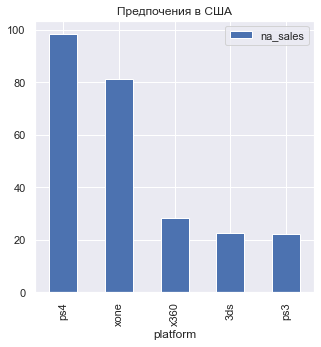

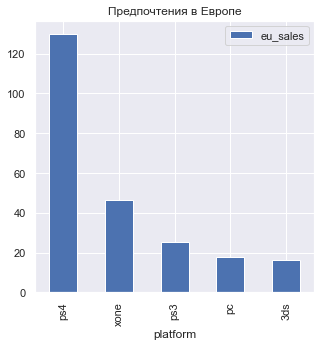

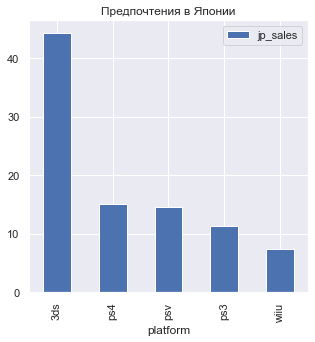

In [57]:
# напишем функцию для создания гистограмм по топ-5 популярным платформам или жанрам
# в зависимости от региона

titles_list = ['Предпочения в США', 'Предпочтения в Европе', 'Предпочтения в Японии']
regions_list = ['na_sales', 'eu_sales', 'jp_sales']

def platforms_pict(region, group_by = 'platform', t = 'Предпочитаемые платформы в США'):
    df_actual = df_2[df_2['year_of_release'] >= 2010]
    df_actual.groupby(group_by).agg({region : 'sum'})\
                                .sort_values(by=region, ascending=False)\
                                .head(5)\
                                .plot(title = t, kind='bar', figsize=(5,5))
        
for i in range(len(regions_list)):
    platforms_pict(regions_list[i], 'platform', titles_list[i])

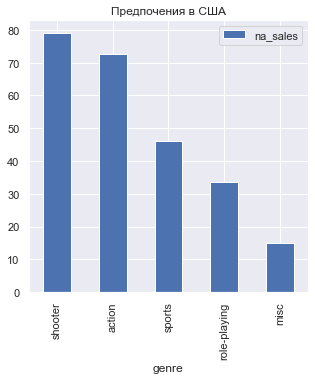

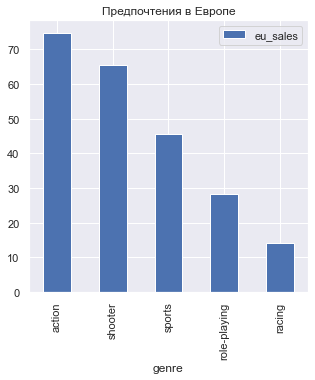

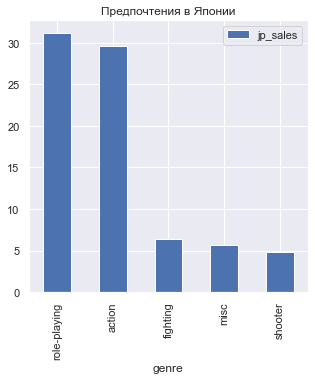

In [58]:
for i in range(len(regions_list)):
    platforms_pict(regions_list[i], 'genre', titles_list[i])

***Выводы***

Мы видим, что больше всего игр продается в Европе (почти 130 млн копий для самого популярного жанра), на втором месте США (почти 100 млн копий), на третьем Япония (ок.45 млн копий). Предпочтения по платформам и жанрам различаются. В то время как платформы x360 и ps4 лидируют по продажам в США и Европе, в Японии на первом месте оказалась 3ds. Здесь присутствуют и wiiu, и psv, не пользующиеся такой популярностью на Западе.

В том, что касается жанровых предпочтений, Европа и США почти совпадают - экшн, шутеры и спортивные игры лидируют, затем идут ролевые игры. В Европе в топ-5 вошли гонки, которых нет в других регионах. Япония отличается в том, что ролевые игры по популярности здесь превосходят экшн, затем следуют файтинги, "разное" и шутеры.

#### Влияние возрастного рейтинга на продажи в отдельном регионе

Приведем расшифровку рейтингов ESRB:

- е - everyone (для всех категорий пользователей)
- m - mature (для взрослых)
- t - teen (для подростков)
- e10+ - everyone 10 and older (для всех старше 10 лет)
- k-a - kids to adults (для детей и взрослых, от 6 лет и старше)
- ao - adults only (только для взрослых, строго старше 18 лет)
- ec - early childhood (для детей младшего возраста, от 3 лет и старше)
- rp - rating pending (рейтинг ожидается)

Text(0.5, 1.0, 'Возрастной рейтинг и продажи в США')

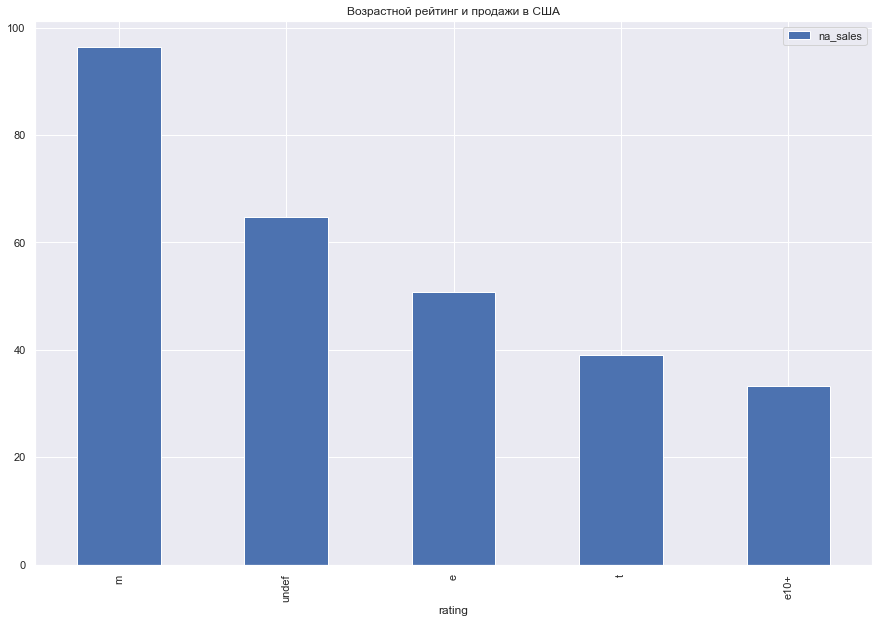

In [59]:
df_2.groupby(by='rating')\
    .agg({'na_sales':'sum'})\
    .sort_values(by='na_sales', ascending=False)\
    .head(15)\
    .plot(kind='bar')\
    .set_title('Возрастной рейтинг и продажи в США')

Text(0.5, 1.0, 'Возрастной рейтинг и продажи в Европе')

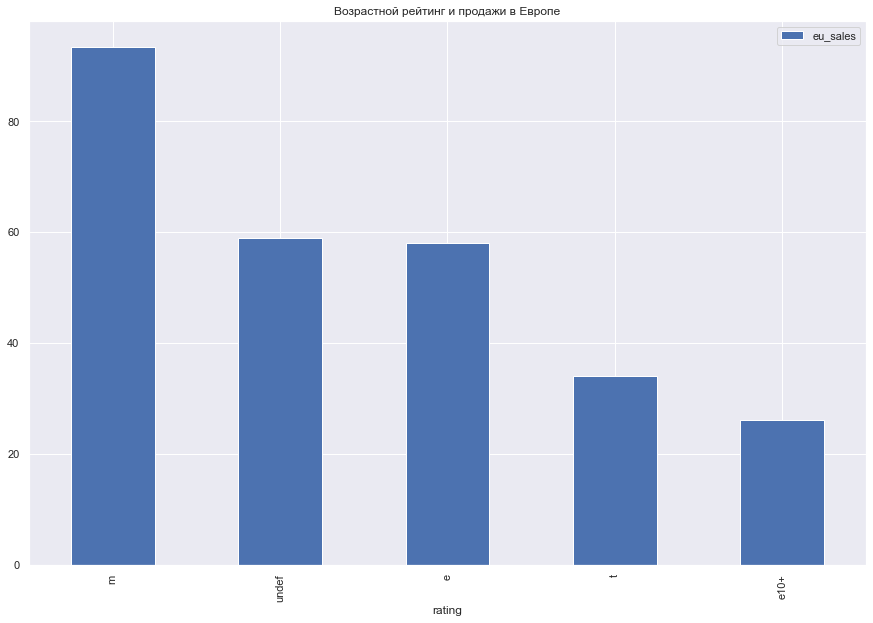

In [60]:
df_2.groupby(by='rating')\
    .agg({'eu_sales':'sum'})\
    .sort_values(by='eu_sales', ascending=False)\
    .head(15)\
    .plot(kind='bar')\
    .set_title('Возрастной рейтинг и продажи в Европе')

Text(0.5, 1.0, 'Возрастной рейтинг и продажи в Японии')

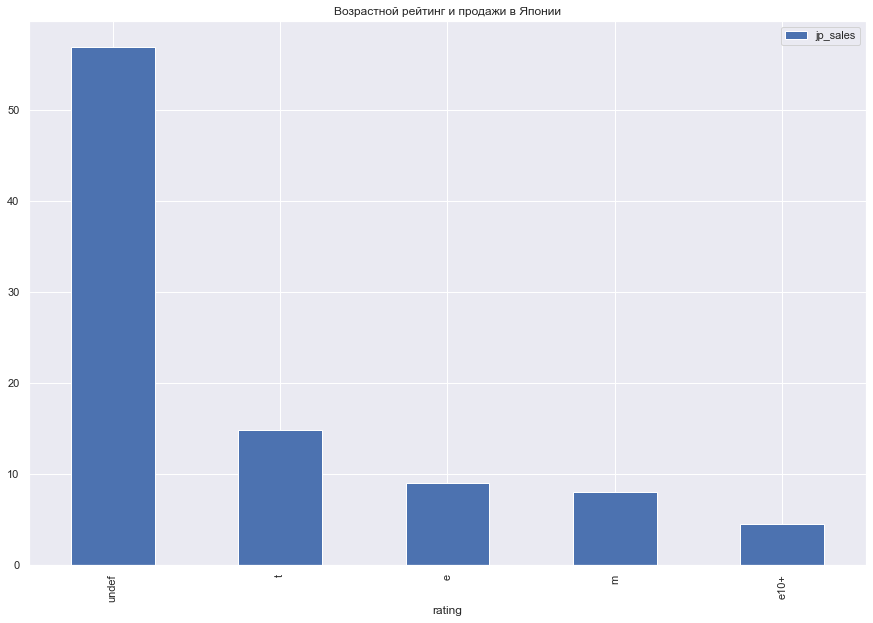

In [61]:
df_2.groupby(by='rating')\
    .agg({'jp_sales':'sum'})\
    .sort_values(by='jp_sales', ascending=False)\
    .head(15)\
    .plot(kind='bar')\
    .set_title('Возрастной рейтинг и продажи в Японии')

Мы снова видим, что США и Европа практически совпадают в том, что касается количества продаваемых игр по тому или иному возрастному рейтингу, в то время как в количественном выражении в Японии игр продается меньше. В США и Европе лидируют игры с рейтингом m (mature). Затем в обоих регионах следуют игры "без рейтинга". Далее по популярности на Западе идут игры для всех категорий и для подростков, в то время как в Японии игр для подростков продается больше, чем "для всех" и для взрослых. Абсолютным лидером по продажам в Японии стали игры "без рейтинга". Возможно, это связано с тем, что в Японии имеется своя рейтинговая модель (СERO), и большая часть игр оценивается по ней, а не по американской ESRB.

## Проверка гипотез

### Гипотеза 1
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы.

- Гипотеза H0: средний пользовательский рейтинг платформ Xbox One и РС одинаковые.
- Гипотеза Н1: средний пользовательский рейтинг платформ Xbox One и РС отличаются.

In [62]:
alpha = 0.05

xbox1 = df_2[(df_2['platform'] == 'xone') & (df_2['user_score'] > 0)]['user_score']
pc = df_2[(df_2['platform'] == 'pc') & (df_2['user_score'] > 0)]['user_score']

results = st.ttest_ind(xbox1, pc)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


### Гипотеза 2

Средние пользовательские рейтинги жанров `Action` и `Sports` разные.

- Гипотеза Н0: Средние пользовательские рейтинги жанров `Action` и `Sports` одинаковые.
- Гипотеза Н16 Средние пользовательские рейтинги жанров `Action` и `Sports` разные.

In [63]:
action = df_2[(df_2['genre'] == 'action') & (df_2['user_score'] > 0)]['user_score']
sports = df_2[(df_2['genre'] == 'sports') & (df_2['user_score'] > 0)]['user_score']

results = st.ttest_ind(action, sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


## Общие выводы

- В обзоре данных мы подготовили данные к работе, исправив названия столбцов, изменив неудачные типы данных и обработав пропуски; добавили недостающие для анализа данные (сумму продаж по трем регионам).
- Изучив динамику рынка компьютерных игр мы пришли к выводу, что после 2010 года, когда начался ярко выраженный спад, связанный с приходом на рынок мобильных платформ. Так как рынок компьютерных игр очень динамичный, для прогноза на 2017 год для анализа мы взяли последние три года, с 2014 по 2016. Учитывая, что наиболее частое "время жизни" платформы, около 10 лет, можно было бы сделать вывод, что перспективными являются платформы ps4 и x-one, появившиеся в 2013 году. К 2017 они должны были достичь своего пика по продажам. Но вследствие общего "усыхания" рынка такой прогноз сделать нельзя, их продажи тоже падают с 2015 года.
- Тем не менее платформы X-One и ps4 планомерно наращивают количество выпускаемых игр. Также растет количество игр для PC.
- Можно предположить, что популярные платформы регулярно вкладываются в игры категории ААА (широкая аудитория, масштабные рекламные компании), чьи продажи многократно превышают обычный доход от компьютерных игр; вместе с тем часто выпускаются игры, которые вообще не приносят дохода.
- Следует учитывать как отзывы критиков, так и отзывы пользователей, они напрямую коррелируют с уровнем продаж.
- Наибольшей популярностью пользуются динамичные игры (экшн, шутеры, спорт).
- На первом месте по продажам стоит Европа, затем идут США и Япония (130 млн проданных копий для самого популярного жанра, 100 млн и 45 млн соответственно). В США и Европе лидируют платформы x360 и ps4, во всех трех регионах в топ-5 платформ вошла 3ds. В Японии в топ-5 вошли wiiu и psv, которые не так популярны на Западе.
- Хотя активные игры (экшн и шутеры) популярны во всех трех регионах, на Западе они лидируют по продажам, в то время как в Японии большой популярностью обладают ролевые игры.
- Глядя на распределение популярности по возрастному рейтингу можно сделать предположение, что средний пользователь компьютерных игр в Японии моложе, чем в США и Европе.
- В рамках исследования были выдвинуты две гипотезы:
    1. средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые.
    2. средние пользовательские рейтинги жанров `Action` и `Sports` разные.
    
    Первая гипотеза подтвердилась (пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые), вторую пришлось отвергнуть (у жанров `Action` и `Sports` пользовательские рейтинги различаются).
    
- Магазину "Стримчик" можно посоветовать в 2017 году:
    - сделать упор на мобильные платформы;
    - не вкладываться в платформы, присутствующие на рынке больше 5-7 лет;
    - 
    - сосредоточиться на экшн, шутерах и спортивных играх при работе с западным клиентом, и на ролевых играх, платформерах и приключениях при продаже игр в Японии;
    - учитывать рейтинги, особенно рейтинги критиков;
    - ориентироваться на более молодую аудиторию при работе с Японией.